# Árboles para Series de Tiempo

En muchas ocasiones los árboles no son buenos manejando las tendencia, por eso se sugiere
quitar la tendencia y analizar la serie sin tendencia.

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn

In [2]:
Pm25_DF = pd.read_csv("d-Shanghai-1317.txt",index_col=False,names=['PM25'])
Pm25_DF
Pm25_DF.size

1611

In [3]:
indice = pd.date_range(start='1/1/2013', periods=1611, freq='D')
indice
PM25ts =pd.Series(Pm25_DF['PM25'].values,index=indice)
PM25df =pd.DataFrame(Pm25_DF['PM25'].values,index=indice)
type(PM25ts)

pandas.core.series.Series

2013-01-01    78.08333
2013-01-02    58.54167
2013-01-03    45.87500
2013-01-04    49.25000
2013-01-05    52.87500
Freq: D, dtype: float64


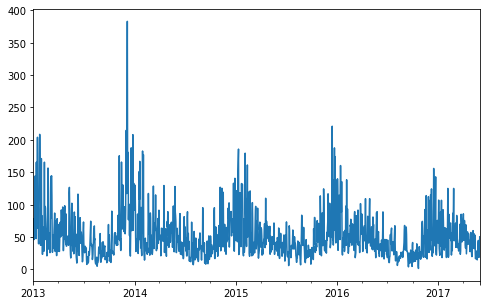

In [4]:
print(PM25ts.head(5))

PM25ts.plot(figsize=(8,5))
pyplot.show()

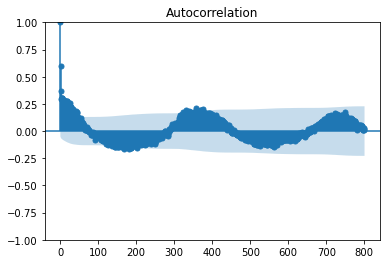

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(PM25ts,lags=800)
pyplot.show()

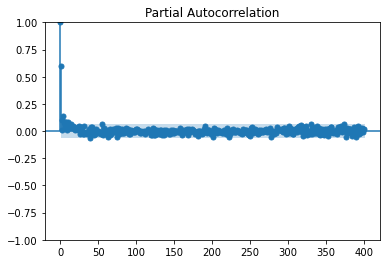

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(PM25ts,lags=400,method='ywm',alpha=0.01)
pyplot.show()

In [7]:
import statsmodels.api as sm
pacf =  sm.tsa.stattools.pacf(PM25ts, nlags=400,method='ywm')
T = len(PM25ts)

sig_test = lambda tau_h: np.abs(tau_h) > 2.58/np.sqrt(T)

In [8]:
pacf

array([ 1.00000000e+00,  5.97816671e-01,  1.30844662e-02,  1.04761299e-01,
        1.36687529e-01,  8.56474781e-02,  8.33878363e-02,  5.42210600e-02,
        8.10517485e-02,  1.35963250e-02,  8.59408315e-02,  6.55035506e-02,
        3.28306866e-02,  3.78878156e-02,  6.39845672e-02,  2.63762872e-02,
        3.78505465e-02,  4.97239184e-02,  4.08614491e-02,  1.87009571e-02,
        1.42161683e-02,  1.49318766e-02,  1.92964729e-02,  4.13788017e-02,
        1.17537368e-02,  4.22464072e-02, -3.03627302e-02,  3.70492475e-02,
       -8.20011151e-03,  4.05575929e-03, -2.64830378e-02, -2.38851883e-02,
        4.32149542e-02, -1.89858198e-02, -6.20374387e-03, -2.44593503e-02,
       -1.04578268e-02, -1.40599416e-02,  1.49030573e-02, -6.22563843e-02,
       -2.57600736e-02,  3.54343165e-02,  3.73289635e-02, -1.23728353e-02,
        8.35193424e-03, -3.23995498e-02, -2.86863308e-02,  1.48710640e-02,
       -1.01397298e-02, -1.55429186e-02, -3.46333779e-03, -1.85370774e-02,
       -8.19087460e-03, -

In [9]:
for i in range(len(pacf)):
    if sig_test(pacf[i]) == False:
        n_steps = i - 1
        print('n_steps set to', n_steps)
        break

n_steps set to 1


## Periodograma

4
0.002482929857231533


402.75

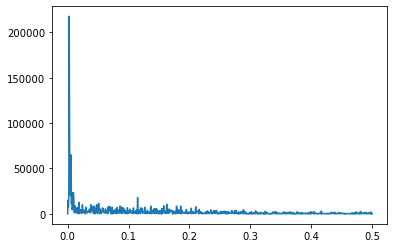

In [10]:

f, Pxx_den=sp.signal.periodogram(PM25ts.values)
plt.plot(f, Pxx_den)
#plt.axvline(x=1/50,color='red')
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)
1/frecuencia_max

In [11]:
import heapq
print(heapq.nlargest(10, range(len(Pxx_den)), key=Pxx_den.__getitem__))


[4, 5, 9, 7, 15, 11, 6, 8, 16, 185]


In [12]:
print(1/f[4])
print(1/f[5])
print(1/f[9])
print(1/f[7])
print(1/f[15])
print(1/f[11])

402.75
322.2
179.0
230.14285714285717
107.39999999999999
146.45454545454547


1
0.00390625


256.0

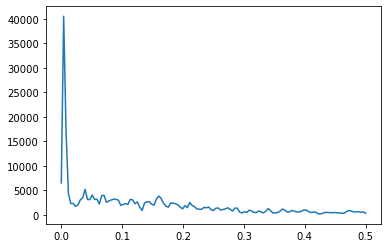

In [13]:
f_welch, Pxx_den_welch=sp.signal.welch(PM25ts.values)
plt.plot(f_welch, Pxx_den_welch)

max_index_value_welch = np.argmax(Pxx_den_welch, axis=0)
print(max_index_value_welch)
frecuencia_max_welch=f_welch[max_index_value_welch]
print(frecuencia_max_welch)
1/frecuencia_max_welch






In [14]:
import heapq
print(heapq.nlargest(10, range(len(Pxx_den_welch)), key=Pxx_den_welch.__getitem__))
print(1/f_welch[1])
print(1/f_welch[2])
print(1/f_welch[3])


[1, 2, 0, 10, 3, 13, 18, 17, 41, 9]
256.0
128.0
85.33333333333333


## Creación de variables rezagadas

In [15]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [16]:

for i in range(10,0,-1):
    df1[['t-'+str(i)]] = PM25df.shift(i)
    
for i in range(370,364,-1):   
    df1[['t-'+str(i)]] = PM25df.shift(i)
print(df1)

                t-10       t-9       t-8       t-7       t-6       t-5  \
2013-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2017-05-26  22.75000  23.45833  28.29167  22.33333  18.20833  14.62500   
2017-05-27  23.45833  28.29167  22.33333  18.20833  14.62500  23.29167   
2017-05-28  28.29167  22.33333  18.20833  14.62500  23.29167  18.33333   
2017-05-29  22.33333  18.20833  14.62500  23.29167  18.33333  39.87500   
2017-05-30  18.20833  14.62500  23.29167  18.33333  39.87500  44.62500   

                 t-4       t-3       t-2       t-1     t-370     t-369  \
2013-01-01       NaN       NaN       

In [17]:
# Create column t
df1['t'] = PM25df.values
print(df1.head(13))

                t-10       t-9       t-8       t-7        t-6        t-5  \
2013-01-01       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-02       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-03       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-04       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-05       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-06       NaN       NaN       NaN       NaN        NaN   78.08333   
2013-01-07       NaN       NaN       NaN       NaN   78.08333   58.54167   
2013-01-08       NaN       NaN       NaN  78.08333   58.54167   45.87500   
2013-01-09       NaN       NaN  78.08333  58.54167   45.87500   49.25000   
2013-01-10       NaN  78.08333  58.54167  45.87500   49.25000   52.87500   
2013-01-11  78.08333  58.54167  45.87500  49.25000   52.87500   85.12500   
2013-01-12  58.54167  45.87500  49.25000  52.87500   85.12500  144.00000   
2013-01-13  

In [18]:
# Create a new subsetted dataframe, removing Nans from first 370 rows
df1_PM25 = df1[370:]
print(df1_PM25)
df1_PM25.size

                 t-10        t-9        t-8        t-7        t-6        t-5  \
2014-01-06   60.29167   98.87500  132.87500  114.79170   96.45833  126.70830   
2014-01-07   98.87500  132.87500  114.79170   96.45833  126.70830   91.45833   
2014-01-08  132.87500  114.79170   96.45833  126.70830   91.45833  129.91670   
2014-01-09  114.79170   96.45833  126.70830   91.45833  129.91670   99.75000   
2014-01-10   96.45833  126.70830   91.45833  129.91670   99.75000   50.33333   
...               ...        ...        ...        ...        ...        ...   
2017-05-26   22.75000   23.45833   28.29167   22.33333   18.20833   14.62500   
2017-05-27   23.45833   28.29167   22.33333   18.20833   14.62500   23.29167   
2017-05-28   28.29167   22.33333   18.20833   14.62500   23.29167   18.33333   
2017-05-29   22.33333   18.20833   14.62500   23.29167   18.33333   39.87500   
2017-05-30   18.20833   14.62500   23.29167   18.33333   39.87500   44.62500   

                  t-4        t-3       

21097

skforecast  es una librería de python que permite "
Time series forecasting with scikit-learn regressors", la cual permiten desde la partición de los datos, y la cración del aprendizaje supervisado.Funciona bien con las funciones de sklearn. Ver https://joaquinamatrodrigo.github.io/skforecast/0.5.0/index.html.

# Dividir los datos


In [19]:
# Split data

PM25split = df1_PM25.values
# split into lagged variables and original time series
X1= PM25split[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =PM25split[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [20]:
print(X1)
print(y1)

[[ 60.29167  98.875   132.875   ...  49.25     52.875    85.125  ]
 [ 98.875   132.875   114.7917  ...  52.875    85.125   144.     ]
 [132.875   114.7917   96.45833 ...  85.125   144.      122.875  ]
 ...
 [ 28.29167  22.33333  18.20833 ...  31.91667  30.66667  43.625  ]
 [ 22.33333  18.20833  14.625   ...  30.66667  43.625    56.08333]
 [ 18.20833  14.625    23.29167 ...  43.625    56.08333  58.     ]]
[27.54167 46.20833 38.91667 ... 18.75    22.875   50.20833]


In [21]:
print(X1[1])
print(y1[1])

[ 98.875   132.875   114.7917   96.45833 126.7083   91.45833 129.9167
  99.75     50.33333  27.54167  58.54167  45.875    49.25     52.875
  85.125   144.     ]
46.20833


In [22]:


Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

# Se debe adicionar en este caso una observación a algún conjunto de datos, en este caso es para el conjunto de validación

Complete Observations for Target after Supervised configuration: 1241
868 124 248
Train + Validation + Test: 1240


In [23]:
# Target Train-Validation-Test split(70-10-20)
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 1241
Training Observations for Target: 868
Validation Observations for Target: 125
Test Observations for Target: 248


In [24]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))


Observations for Feature: 1241
Training Observations for Feature: 868
Validation Observations for Feature: 125
Test Observations for Feature: 248


In [26]:
# Decision Tree Regresion Model


from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_PM25 = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_PM25.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_PM25.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_PM25.score(val_feature,val_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM sobre validación es:",(((decision_tree_PM25.predict(val_feature)-val_target)**2).mean()) )


Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -0.30985805818749723
el RECM sobre validación es: 19.97195530874934


The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse(with respect to predict with sample mean)). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [27]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,6,7,8,9,10,11]:
    # Create the tree and fit it
    decision_tree_PM25 = DecisionTreeRegressor(max_depth=d)
    decision_tree_PM25.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_PM25.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_PM25.score(val_feature, val_target), '\n')  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_PM25.predict(val_feature),val_target, squared=False))



max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.30595782895521384
Coeficiente R2 sobre el conjunto de validación: 0.12166389092460594 

el RECM sobre el conjunto de validación es: 16.35455893322211
max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.37335453256440254
Coeficiente R2 sobre el conjunto de validación: 0.2675057747910007 

el RECM sobre el conjunto de validación es: 14.935183745952715
max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.4486965446509723
Coeficiente R2 sobre el conjunto de validación: 0.30860083010517403 

el RECM sobre el conjunto de validación es: 14.510183154826272
max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.5164881550957239
Coeficiente R2 sobre el conjunto de validación: 0.22988548178374524 

el RECM sobre el conjunto de validación es: 15.313911144208303
max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.5698004596282812
Coeficiente R2 sobre el conjunto de validación: 0.091

Note que el score mayor para el conjunto de prueba es para max depth =4

# Usando la Penalización

In [52]:
path=decision_tree_PM25.cost_complexity_pruning_path(train_feature, train_target)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())
print(alphas.max())
div=25

[0.00000000e+00 6.40028162e-05 1.21005984e-04 1.96010305e-04
 3.85354369e-04 4.41028226e-04 4.84034498e-04 5.29030178e-04
 5.76036866e-04 7.05373571e-04 7.29046659e-04 8.00044803e-04
 8.41063108e-04 9.00057604e-04 9.61066468e-04 9.61066468e-04
 1.22507280e-03 1.36909354e-03 1.52109735e-03 1.63343041e-03
 1.84898074e-03 2.30414747e-03 2.40113799e-03 2.70418139e-03
 2.99285678e-03 3.24920795e-03 3.60023041e-03 4.09624168e-03
 4.09627240e-03 4.37427995e-03 4.76130472e-03 5.04198642e-03
 5.18433180e-03 6.24137417e-03 6.44075295e-03 6.44075295e-03
 6.88942764e-03 6.88942764e-03 7.10580368e-03 7.56498416e-03
 8.10051843e-03 8.84507672e-03 9.60464606e-03 9.60492832e-03
 1.00006560e-02 1.12073533e-02 1.14090832e-02 1.15377740e-02
 1.22887865e-02 1.23217886e-02 1.39248534e-02 1.56973148e-02
 1.59424344e-02 1.74251152e-02 1.78234227e-02 1.80975164e-02
 1.84972056e-02 1.91856279e-02 2.03014473e-02 2.10262993e-02
 2.31054763e-02 2.58768763e-02 2.65707266e-02 3.00018721e-02
 3.16233408e-02 3.399105

In [54]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeRegressor(ccp_alpha=i)

    tree.fit(train_feature, train_target)
    y_train_pred=tree.predict(train_feature)
    y_val_pred=tree.predict(val_feature)


    accuracy_train.append(sklearn.metrics.mean_squared_error(y_train_pred, train_target, squared=False))
    accuracy_test.append(sklearn.metrics.mean_squared_error(y_val_pred, val_target,squared=False))





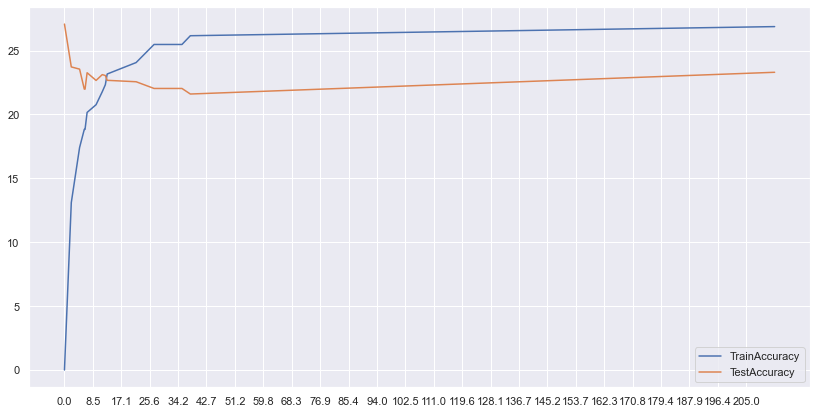

In [29]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))

sns.lineplot(y=accuracy_train,x=alphas,label="TrainAccuracy")

sns.lineplot(y=accuracy_test,x=alphas,label="TestAccuracy")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div
))
plt.show()

Note que le valor de $\alpha$ donde se hace mínimo el error cuadrático medioestá entre  33 y 36, aunque eso hace que el error esobre le conjunto de prueba se vuelva mas grande. Vamos a tomar un valor de 25.6 para alpha y computaremos el árbol basado en ese valor de $\alpha$.

# Juntar Entrenamiento y Validación

In [28]:
print(type(train_feature))
print(type(val_feature))

#######

print(type(train_target))
print(type(val_target))

####
print(train_feature.shape)
print(val_feature.shape)

#####

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(868, 16)
(125, 16)
(868,)
(125,)
(993, 16)
(993,)


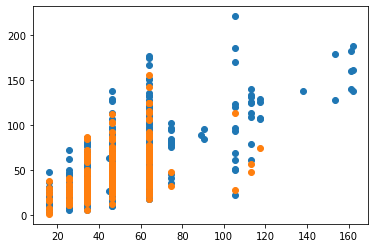

Raíz de la Pérdida cuadrática Entrenamiento: 21.865979236478157
Raíz de la Pérdida cuadrática Prueba: 23.988866047421954


In [29]:
# Plot predicted against actual values but with train + val

from matplotlib import pyplot as plt

# Use the best max_depth 

decision_tree_PM25 = DecisionTreeRegressor(max_depth=4)  # fill in best max depth here
decision_tree_PM25.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction = decision_tree_PM25.predict(train_val_feature)
test_prediction = decision_tree_PM25.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction, train_val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, train_val_target,squared=False))

print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error(test_prediction, test_target,squared=False))


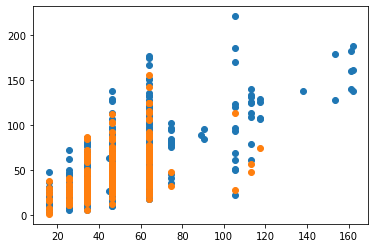

In [77]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_PM25_prun_mincost = DecisionTreeRegressor(ccp_alpha=25.6)  # fill in best max depth here
decision_tree_PM25_prun_mincost.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction_prun_mincost = decision_tree_PM25.predict(train_val_feature)
test_prediction_prun_mincost = decision_tree_PM25.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction_prun_mincost, train_val_target, label='train')  # blue
plt.scatter(test_prediction_prun_mincost, test_target, label='test')  # orange
plt.show()

In [78]:
from sklearn import tree

listacaract=list(df1_PM25.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_PM25)
print(text_representation)

|--- feature_9 <= 53.50
|   |--- feature_9 <= 34.02
|   |   |--- feature_9 <= 19.85
|   |   |   |--- feature_9 <= 15.02
|   |   |   |   |--- value: [15.69]
|   |   |   |--- feature_9 >  15.02
|   |   |   |   |--- value: [25.40]
|   |   |--- feature_9 >  19.85
|   |   |   |--- feature_5 <= 159.17
|   |   |   |   |--- value: [34.22]
|   |   |   |--- feature_5 >  159.17
|   |   |   |   |--- value: [90.35]
|   |--- feature_9 >  34.02
|   |   |--- feature_13 <= 173.77
|   |   |   |--- feature_4 <= 204.23
|   |   |   |   |--- value: [46.04]
|   |   |   |--- feature_4 >  204.23
|   |   |   |   |--- value: [138.25]
|   |   |--- feature_13 >  173.77
|   |   |   |--- feature_5 <= 68.21
|   |   |   |   |--- value: [44.83]
|   |   |   |--- feature_5 >  68.21
|   |   |   |   |--- value: [153.58]
|--- feature_9 >  53.50
|   |--- feature_10 <= 130.38
|   |   |--- feature_2 <= 176.73
|   |   |   |--- feature_9 <= 138.98
|   |   |   |   |--- value: [64.10]
|   |   |   |--- feature_9 >  138.98
|   |   |

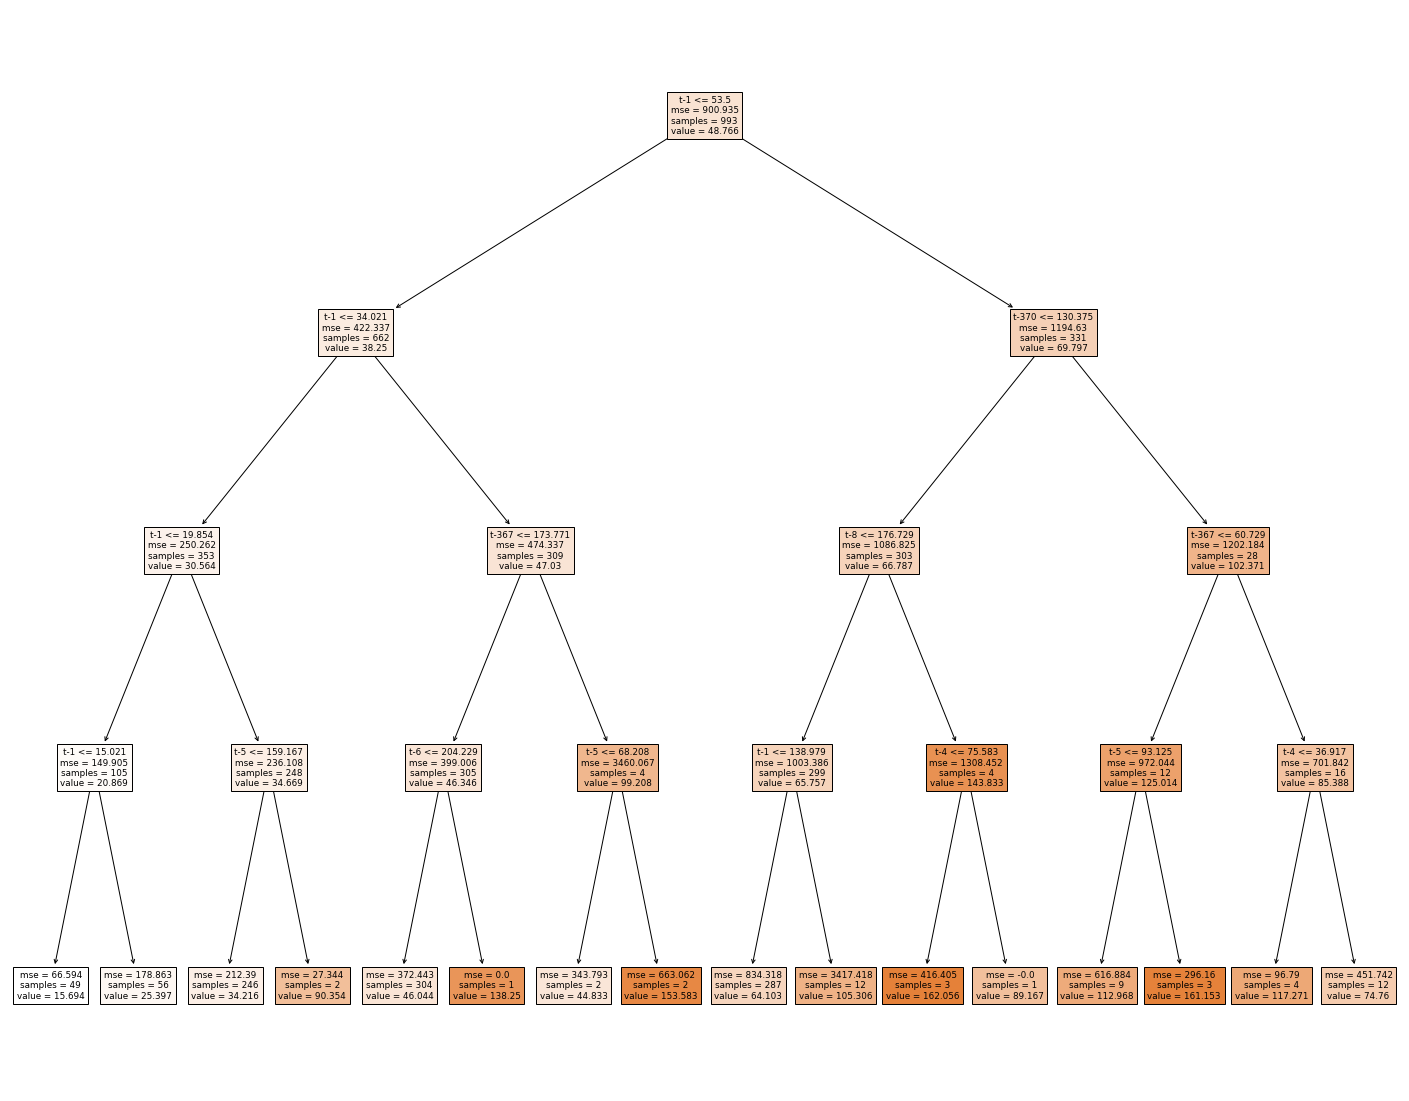

In [79]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_PM25, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)

Verficando las dimensiones del conjunto de prueba y del conjunto de entrenamiento para hacer las gráficas de comparación entre los verdaderos valores y sus pronósticos.

In [80]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

993
993
248
248


In [83]:
indicetrian_val_test=df1_PM25.index
print(indicetrian_val_test.size)  ###Tamaño del índice
indicetrain_val=indicetrian_val_test[0:993]
indicetest=indicetrian_val_test[993:1241]

1241


In [84]:
print(indicetrain_val.size)
print(indicetest.size)

993
248


In [85]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

1241
1241


In [86]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
ObsvsPred.head(10)

,observado,Predicción
2014-01-06,27.54167,46.043586
2014-01-07,46.20833,34.215955
2014-01-08,38.91667,46.043586
2014-01-09,34.29167,46.043586
2014-01-10,45.58333,46.043586
2014-01-11,45.45833,46.043586
2014-01-12,85.41667,46.043586
2014-01-13,39.41667,64.103077
2014-01-14,24.50000,46.043586
2014-01-15,34.41667,34.215955


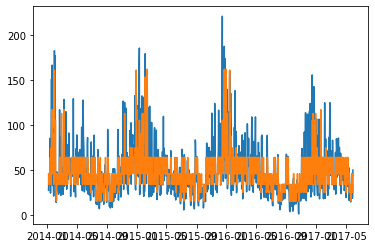

In [87]:
plt.plot(ObsvsPred)


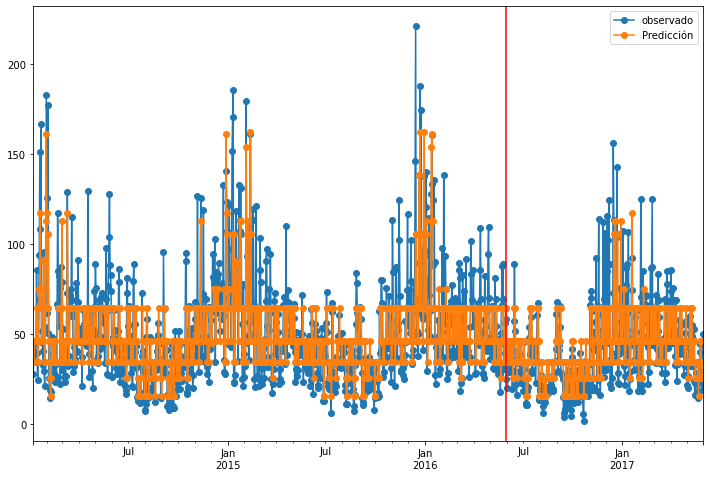

In [89]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_val_test[876].date(),color='red')